In [5]:
#import libraries

from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from textblob import TextBlob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import emoji
print('Library Imported')

Library Imported


In [ ]:
# !pip install emoji

In [6]:

class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets
    
    print('User Authenticate')

User Authenticate


In [7]:
# USER AUTHENTICATER FUNCTION

class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        # This is user credentials to access Tweets from Twitter with the help of Twitter  API 
        ACCESS_TOKEN = "1215328073513500672-sGTk0W3GBBtTkVnTBJHNwLWHiJvDcR"
        ACCESS_TOKEN_SECRET = "Pr7JLL8Jk5o2bzzQd0fuSxnHLF2kKGFt0nmgViOgrtQAh"
        CONSUMER_KEY = "OLUdVphpOjVLeQdposMVgkKhU"
        CONSUMER_SECRET = "W0j0veOITXlGipHZ0egOqRGX5uHAORuwUouinKhZ52EyOe1rw1"
        
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

        return auth

    print('Passing Access Token and Consumer Key in Twitter Authenticate')

Passing Access Token and Consumer Key in Twitter Authenticate


In [8]:
# TWITTER STREAMER AND PROCESSING FUNCTION
class TwitterStreamer():
    
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)
    print('Streaming and Processing of Tweets')

Streaming and Processing of Tweets


In [9]:
# STREAM LISTENER 

class TwitterListener(StreamListener):
    
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)
        
    print('Twitter Listener Prints Received Tweets')

Twitter Listener Prints Received Tweets


In [10]:
import re
class TweetAnalyzer():
    
    def clean_tweet(self, tweet):
        
        # Remove contraction words from Tweets
        
        contraction_words = {"ain't": 'is not', "amn't": 'am not', "aren't": 'are not', "can't": 'cannot', "'cause": 'because', "couldn't": 'could not', 
                             "couldn't've": 'could not have', "could've": 'could have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', 
                             "didn't": 'did not', "doesn't": 'does not', "don't": 'do not', "e'er": 'ever', 'em': 'them', "everyone's": 'everyone is', 
                             'finna': 'fixing to', 'gimme': 'give me', 'gonna': 'going to', "gon't": 'go not', 'gotta': 'got to', "hadn't": 'had not', 
                             "hasn't": 'has not', "haven't": 'have not', "he'd": 'he would', "he'll": 'he will', "he's": 'he is', "he've": 'he have', 
                             "how'd": 'how would', "how'll": 'how will', "how're": 'how are', "how's": 'how is', "I'd": 'I would', "I'll": 'I will', 
                             "I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "isn't": 'is not', "it'd": 'it would', "it'll": 'it will', 
                             "it's": 'it is', "I've": 'I have', 'kinda': 'kind of', "let's": 'let us', "mayn't": 'may not', "may've": 'may have', 
                             "mightn't": 'might not', "might've": 'might have', "mustn't": 'must not', "mustn't've": 'must not have', "must've": 'must have', 
                             "needn't": 'need not', "ne'er": 'never', "o'": 'of', "o'er": 'over', "ol'": 'old', "oughtn't": 'ought not', 
                             "shalln't": 'shall not', "shan't": 'shall not', "she'd": 'she would', "she'll": 'she will', "she's": 'she is', 
                             "shouldn't": 'should not', "shouldn't've": 'should not have', "should've": 'should have', "somebody's": 'somebody is', 
                             "someone's": 'someone is', "something's": 'something is', "that'd": 'that would', "that'll": 'that will', "that're": 'that are', 
                             "that's": 'that is', "there'd": 'there would', "there'll": 'there will', "there're": 'there are', "there's": 'there is', 
                             "these're": 'these are', "they'd": 'they would', "they'll": 'they will', "they're": 'they are', "they've": 'they have', 
                             "this's": 'this is', "those're": 'those are', "'tis": 'it is', "'twas": 'it was', 'wanna': 'want to', "wasn't": 'was not', 
                             "we'd": 'we would', "we'd've": 'we would have', "we'll": 'we will', "we're": 'we are', "weren't": 'were not', "we've": 'we have', 
                             "what'd": 'what did', "what'll": 'what will', "what're": 'what are', "what's": 'what is', "what've": 'what have', 
                             "when's": 'when is', "where'd": 'where did', "where're": 'where are', "where's": 'where is', "where've": 'where have', 
                             "which's": 'which is', "who'd": 'who would', "who'd've": 'who would have', "who'll": 'who will', "who're": 'who are', 
                             "who's": 'who is', "who've": 'who have', "why'd": 'why did', "why're": 'why are', "why's": 'why is', "won't": 'will not', 
                             "wouldn't": 'would not', "would've": 'would have', "y'all": 'you all', "you'd": 'you would', "you'll": 'you will', 
                             "you're": 'you are', "you've": 'you have', 'Whatcha': 'What are you', 'luv': 'love', 'sux': 'sucks'}
        
        tweet=tweet.lower()
        new_tweet=tweet.split()
        for i in new_tweet:
          if i in contraction_words:
             tweet.replace(i,contraction_words[i])
            
        # Remove Hyperlinks and URLs from Tweets
        tweet=re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)','',tweet)

        # Remove Special Character, hashtags and Punctuations  from Tweets
        tweet = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", tweet)

        # Remove Emoji from Tweets
        tweet = emoji.demojize(tweet)

        #print(tweet)
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


    def analyze_sentiment(self, tweet):
        #print(self.clean_tweet(tweet))
        analysis = TextBlob(self.clean_tweet(tweet))
        #print('yes',analysis.sentiment)
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        elif analysis.sentiment.polarity < 0:
            return -1

    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        df['location']=np.array([tweet.user.location for tweet in tweets])

        return df

    print('Analysing the Tweets Using TextBlob')

Analysing the Tweets Using TextBlob


In [11]:
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="Pfizer", count = 200)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

    print(df)

                                                tweets  ...  sentiment
0    Pfizer Medical Information is here to support ...  ...          1
1    Creatives, we’re going live in an hour! Help u...  ...          1
2    Proud to stand alongside so many other committ...  ...          1
3    RT @AlbertBourla: Proud to join the @AdobeSumm...  ...          1
4    Calling all creatives! Join us tomorrow for th...  ...          0
..                                                 ...  ...        ...
195  RT @FierceBiotech: “R&amp;D should be rewarded...  ...          1
196  The Pfizer of 2021 is all about science and pa...  ...          0
197  2021’s @AtMIndex  biennial ranking has Pfizer ...  ...          1
198  At @BloombergLive #TheYearAhead, @AlbertBourla...  ...          0
199  NEWS: The final 12 to 15-year-old participant ...  ...          0

[200 rows x 9 columns]


In [12]:
# Here we are defining the data classifying function.
def Data_Classifying(data):
  
  # Here we are declaring some useful variable.
  positive = 0 
  negative = 0
  neutral = 0

  # Here we are iterating the data and counting the different classes.
  for i in df.sentiment:
    if i == 1:
      positive = positive + 1
    elif i == 0:
      neutral = neutral + 1
    elif i == -1:
      negative = negative + 1

  return [positive,negative,neutral]

# Here we are calling the data classifying function.
positive , negative , neutral = Data_Classifying(df.sentiment)

print('Total Number of Positive Classes : - ',positive)
print('Total Number of Neutral Classes : - ',neutral)
print('Total Number of Negative Classes : - ',negative)

Total Number of Positive Classes : -  89
Total Number of Neutral Classes : -  96
Total Number of Negative Classes : -  15


Graphical Representation of Sentiment Analysis


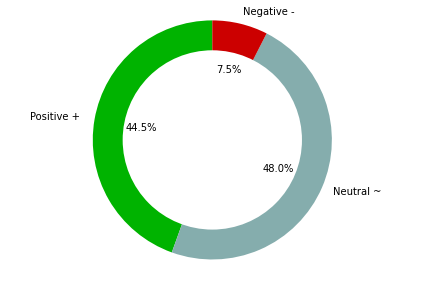

In [13]:
print('Graphical Representation of Sentiment Analysis')

# Import Matplotlib and Plot Pie Chart.
import matplotlib.pyplot as plt

# Here we are passing the size of pie chart.
sizes = [positive,neutral,negative]

# Here we are passing the label of pie chart.
labels = ["Positive + ","Neutral ~ ","Negative - "]

# Here we are passing the colors fro pie chart. 
colors = ['#00b300','#85adad','#cc0000',]
 
fig1, axis1 = plt.subplots()

# Here we are passing size , colors , labels , autopct  and start angle of pie chart. 
axis1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle = 90)

# Here we are passing the center and radius of circle and color.
centre_of_circle_and_color = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_of_circle_and_color)

axis1.axis('equal')  

# Here we are fixing the layout of pie chart.
plt.tight_layout()

# Here we are showing the pie chart. 
plt.show()

In [14]:
# Import Wordcloud, Pandas and Matplolib.
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Here is Highlight word with high frequency.

Highlight_Words = '' 

# Here is some stop words that we don't want in our word cloud.
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("&amp")
stopwords.add("co")

# Here we are Iterate through the tweets.
for tweet in df.tweets: 
      
    # Here we are casting each tweet to string.
    tweet = str(tweet) 
  
    # Here we are spliting the value. 
    tokens = tweet.split() 
      
    # Here we are Converting each token into lowercase.
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    # Here we are joining the tokens with highlight words.
    Highlight_Words = Highlight_Words + " ".join(tokens) + " "
#print(stopwords)
# Here we are passing the required parameter in word cloud.
wordcloud_words = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(Highlight_Words) 

Pizer Word Cloud : -



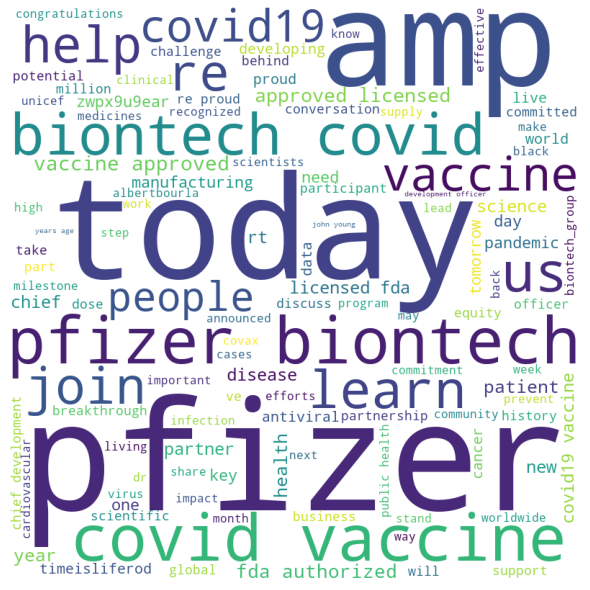

In [15]:
# plot the WordCloud image                        
print('Pizer Word Cloud : -\n')
# Here we are giving figure size and face color.
plt.figure(figsize = (8, 8), facecolor = None) 

# Here we are ploting the word cloud.
plt.imshow(wordcloud_words) 

# Here we are passing axis.
plt.axis("off") 

# Here we are fixing the layout and padding.
plt.tight_layout(pad = 0) 

# Here we are showing the word cloud.
plt.show() 

In [16]:
# Remove Hyperlinks and URLs from Tweets
Highlight_Words=re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)','',Highlight_Words)

# Remove Special Character, hashtags and Punctuations  from Tweets
Highlight_Words = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", Highlight_Words)

dictionary={}
for i in Highlight_Words.split(" "):
  if i not in stopwords and i.isalpha() :
    if i not in dictionary :
      dictionary[i]=1
    else:
      dictionary[i]+=1
dictionary=list(sorted(dictionary.items(),key=lambda x:x[1],reverse=True))
print(dictionary)
  

[('vaccine', 24), ('learn', 10), ('pfizer', 9), ('us', 8), ('proud', 8), ('chief', 8), ('albertbourla', 7), ('science', 7), ('development', 7), ('manufacturing', 7), ('officer', 6), ('timeisliferod', 6), ('key', 6), ('disease', 6), ('pandemic', 6), ('people', 6), ('patients', 6), ('help', 5), ('health', 5), ('join', 5), ('tomorrow', 5), ('discuss', 5), ('one', 5), ('developing', 5), ('years', 5), ('pfizerbiontech', 5), ('support', 4), ('live', 4), ('make', 4), ('will', 4), ('new', 4), ('potential', 4), ('today', 4), ('age', 4), ('effective', 4), ('covax', 4), ('unicef', 4), ('cancer', 4), ('dolsten', 4), ('antiviral', 4), ('business', 4), ('part', 4), ('cardiovascular', 4), ('use', 3), ('joins', 3), ('commitment', 3), ('recognized', 3), ('immune', 3), ('find', 3), ('day', 3), ('committed', 3), ('dr', 3), ('need', 3), ('stand', 3), ('together', 3), ('partner', 3), ('clinicaltrials', 3), ('congratulations', 3), ('partners', 3), ('announced', 3), ('milestone', 3), ('largest', 3), ('commun

In [17]:
word=[]
frequency=[]
for i in range(11):
  word.append(dictionary[i][0])
  frequency.append(dictionary[i][1])

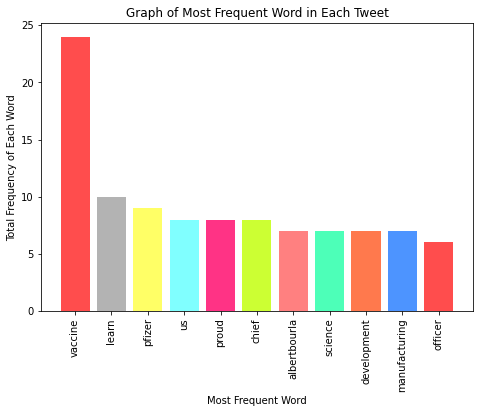

In [18]:
import matplotlib.pyplot as plt

color=['#ff4d4d', '#b3b3b3', '#ffff66', '#80ffff', '#ff3385','#ccff33','#ff8080','#4dffb8','#ff794d','#4d94ff']

fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(word,frequency,color=color)
plt.xlabel("Most Frequent Word")
plt.xticks(rotation = 90)
plt.ylabel("Total Frequency of Each Word")
plt.title("Graph of Most Frequent Word in Each Tweet")
plt.show()